# K-Means Color Normalization

Sometimes shadow and illumination can make it hard for machine learning algorithms to correctly find and segment objects in images. Shadow and illumination provide additional information in pixel colors that may confuse algorithms and make them recognize very bright pixels of an object as being part of another object.

Color normalization is one of the techniques that can be used to mitigate this unwanted behavior from machine learning algorithms. With color normalization it is possible to remove intensity-related information from pixels, eliminating shadows and illumination changes in the image.

K-Means, as well as other clustering algorithms, can normalize the colors of an image by fitting centers and clusterizing pixels. If we normalize each cluster of pixels according to the cluster center/centroid colors, we can eliminate intensity-related information from the image, simplifying its colors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# plot images obtained using K-Means' clusters
def plot_images(array, rows, columns):
    fig = plt.figure(figsize=(columns * 7, rows * 5))

    for i, j in enumerate(array):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.grid(False)
        plt.imshow(j)

    plt.show()

# change the colors of 'img' to remove shadow and illumination using 'n_clusters' for K-Means
def test_image(img, n_clusters):
    # instantiate K-Means with the desired number of clusters. Less clusters mean stronger normalization,
    # i.e., reduction of pixel color intensity
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(img)
    centers = kmeans.cluster_centers_

    # normalize pixel colors using their respective cluster center
    c_c = np.array(np.append(centers, np.matrix([255] * centers.shape[0]).T, axis=1))
    labels = kmeans.labels_
    colors2 = np.array([(c_c[l][0] / 255, c_c[l][1] / 255, c_c[l][2] / 255) for l in labels])

    # reshape normalized color array to have the same shape as the input image
    im2 = np.reshape(colors2, im.shape)
    return im2

Let us load an example image to show the effects of color normalization. In the original image, we can see a flower with many different colors and color intensities. We can see that, as color intensity varies, some portions of the image have stronger shadows and some portions have brighter lighting.

The less clusters we use in K-Means to clusterize the image by pixel colors, the stronger our normalization is. With 8 clusters, the image retain its main colors, some of them disappear, and the color intensity of the pixels is already partially removed. In the 8 cluster image below, it is already easier to segment the flower object and separate it from the background, as the background lost almost all colors that could mix with the flower colors. Note that there is a purple shape in the background because of another purple flower that was blurred in the original image. K-Means is able to detect that blurred flower object as well.

With 4 clusters for K-Means, the flower is almost exclusively the only colored portion of the image. At this point, the flower starts to lose some of its original colors. This is an aberration effect that may occur if the normalization is too heavy. The pixels in the image start to lose completely their original colors.

Finally, with 2 clusters, each cluster focus on one of the 2 main image colors, purple and gray. Now, all of the color intensity is removed from the image and just two color shades remain. The background is gray and the flower is purple. The flower object may be segmented more easily now, but the image colors are very different from the original image and this may negatively impact image segmentation algorithms. Some portions of the flower blended with the background and are now in gray.

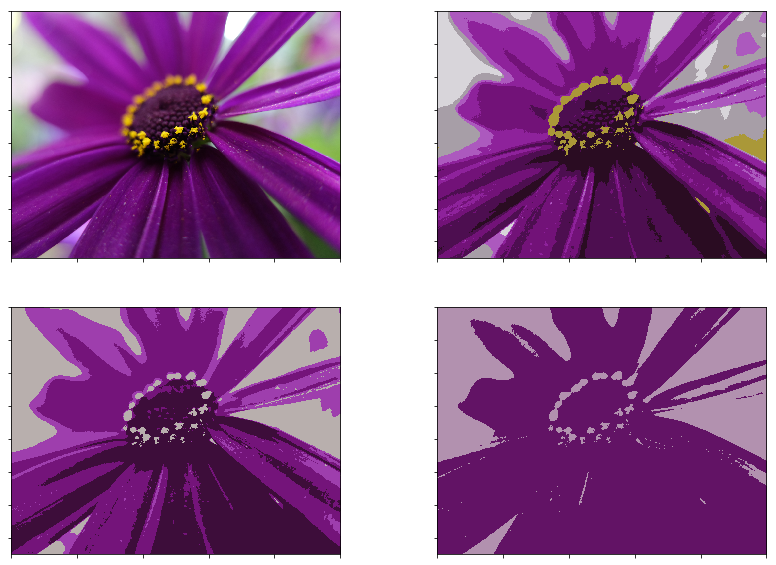

In [ ]:
import imageio

# load the image we want to normalize
im = imageio.imread('../data/raw/flower.png')
im.shape

# reshape the image so that we can use it in K-Means
im_ = im.reshape((750000, 3))
print(im.shape)

# find images with different levels of color normalization
result8 = test_image(im_, 8)
result4 = test_image(im_, 4)
result2 = test_image(im_, 2)

plot_images([im, result8, result4, result2], 2, 2)